In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# %cd drive/MyDrive/Ds203

#Loading Main Dataset [BTC dataset](https://www.kaggle.com/mczielinski/bitcoin-historical-data)

In [ ]:
# Load Data
import pandas as pd
data = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
data_og = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")#keep this untouched 

In [ ]:
display(data)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


# Data Preprocessing

In [ ]:
 data["year"] = pd.to_datetime(data['Timestamp'],unit='s').dt.year

In [ ]:
 data["month"] = pd.to_datetime(data['Timestamp'],unit='s').dt.month

In [ ]:
 data["day"] = pd.to_datetime(data['Timestamp'],unit='s').dt.day

In [ ]:
 data["time"] = pd.to_datetime(data['Timestamp'],unit='s').dt.time

In [ ]:
display(data)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,time
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011,12,31,07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,07:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,2021,3,30,23:56:00
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,2021,3,30,23:57:00
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,2021,3,30,23:58:00
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202,2021,3,30,23:59:00


In [ ]:
from datetime import datetime
data['Timestamp'] = [datetime.fromtimestamp(x) for x in data['Timestamp']]
data = data.set_index('Timestamp')
data.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,time
Timestamp,,,,,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011,12,31,07:52:00
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,07:53:00
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,07:54:00
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,07:55:00
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,07:56:00


In [ ]:
data_new = data.resample("24H").mean()

In [ ]:
data_new["High"] = data["High"].resample("24H").max()

In [ ]:
data_new["Low"] = data["Low"].resample("24H").min()

In [ ]:
data_new["Volatility"] = abs(data_new["High"] - data_new["Low"])/data_new["Weighted_Price"]

In [ ]:
data_new = data_new[1:]

In [ ]:
display(data_new)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,Volatility
Timestamp,,,,,,,,,,,
2012-01-01,4.806667,5.00,4.58,4.806667,7.200667,35.259720,4.806667,2012.0,1.0,1.0,0.087379
2012-01-02,5.000000,5.00,5.00,5.000000,19.048000,95.240000,5.000000,2012.0,1.0,2.0,0.000000
2012-01-03,5.252500,5.32,5.14,5.252500,11.004660,58.100651,5.252500,2012.0,1.0,3.0,0.034269
2012-01-04,5.200000,5.57,4.93,5.223333,11.914807,63.119577,5.208159,2012.0,1.0,4.0,0.122884
2012-01-05,6.281429,6.65,5.72,6.286190,4.514373,27.987370,6.284127,2012.0,1.0,5.0,0.147992
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-27,55193.240643,56686.15,53948.35,55195.415367,1.823877,100884.732367,55193.357260,2021.0,3.0,27.0,0.049604
2021-03-28,55833.608471,56573.04,54677.51,55835.012863,1.447939,80632.115263,55832.958824,2021.0,3.0,28.0,0.033950
2021-03-29,56914.886595,58402.68,54892.42,56915.629993,3.732887,213754.555988,56913.993819,2021.0,3.0,29.0,0.061677


In [ ]:
data_new = data_new.drop(["Open","Close"],axis = 1)

In [ ]:
data_new.to_csv('Bitcoin_2012_2021.csv')

# EDA

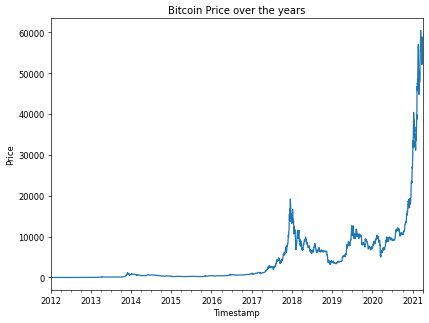

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=60)
data_new["Weighted_Price"].plot()
plt.title("Bitcoin Price over the years")
plt.ylabel("Price")
plt.show()

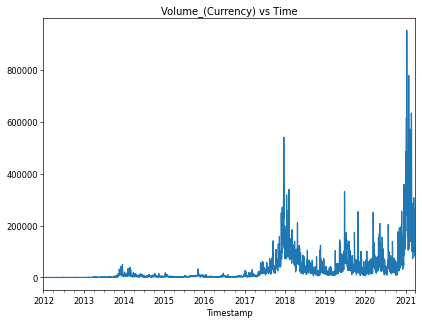

In [ ]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=60)
data_new["Volume_(Currency)"].plot()
plt.title("Volume_(Currency) vs Time")
plt.show()

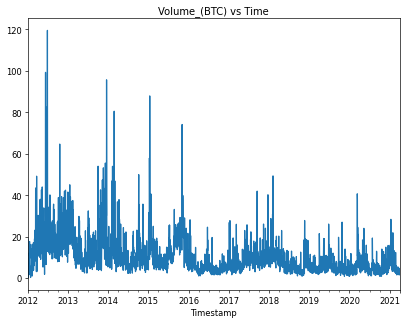

In [ ]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=60)

data_new["Volume_(BTC)"].plot()
plt.title("Volume_(BTC) vs Time")
plt.show()

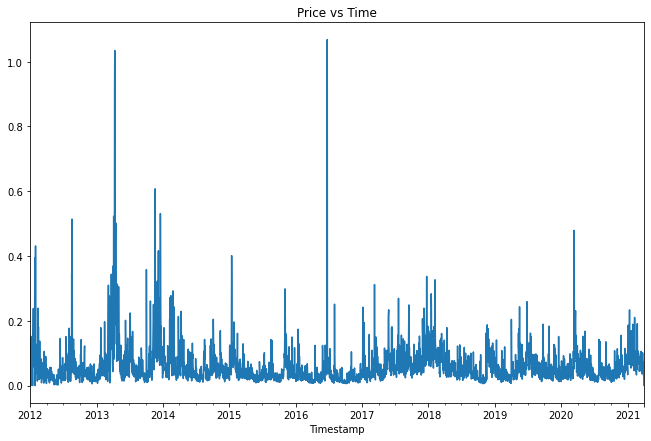

In [ ]:
import matplotlib.pyplot as plt
data_new["Volatility"].plot()
plt.title("Price vs Time")
plt.show()

In [ ]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window=window,center=False).mean()
def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return values.rolling(window=window, center=False).std()
def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band

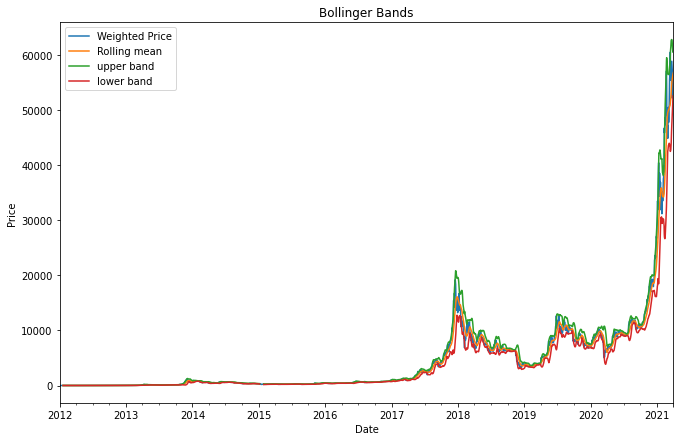

<Figure size 480x360 with 0 Axes>

In [ ]:
# 1. Compute rolling mean
rm = get_rolling_mean(data_new['Weighted_Price'], window=20)

# 2. Compute rolling standard deviation
rstd = get_rolling_std(data_new['Weighted_Price'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm, rstd)
    
# Plot raw Weighted Price values, rolling mean and Bollinger Bands
ax = data_new['Weighted_Price'].plot(title="Bollinger Bands", label='Weighted Price')
rm.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)
figure(figsize=(8, 6), dpi=60)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

## BTC Year 2019

In [ ]:
data_2019 = data_new[data_new["year"] == 2019]

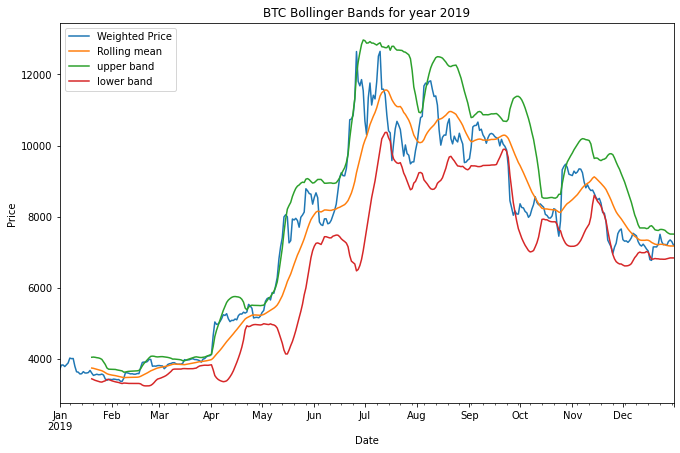

In [ ]:
# 1. Compute rolling mean
rm = get_rolling_mean(data_2019['Weighted_Price'], window=20)

# 2. Compute rolling standard deviation
rstd = get_rolling_std(data_2019['Weighted_Price'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm, rstd)
    
# Plot raw Weighted Price values, rolling mean and Bollinger Bands
ax = data_2019['Weighted_Price'].plot(title="BTC Bollinger Bands for year 2019", label='Weighted Price')
rm.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

In [ ]:
data_min_2019 = data[data["year"] == 2019]

In [ ]:
display(data_min_2019)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,time
Timestamp,,,,,,,,,,,
2019-01-01 00:00:00,3693.85,3698.79,3693.85,3698.00,5.491289,20301.156505,3696.974936,2019,1,1,00:00:00
2019-01-01 00:01:00,3694.72,3694.72,3690.65,3690.65,9.500151,35080.265871,3692.600865,2019,1,1,00:01:00
2019-01-01 00:02:00,3689.73,3689.73,3686.62,3686.62,0.965966,3562.371230,3687.884698,2019,1,1,00:02:00
2019-01-01 00:03:00,3692.85,3692.85,3688.32,3692.35,0.296662,1095.220713,3691.813285,2019,1,1,00:03:00
2019-01-01 00:04:00,3692.35,3692.35,3690.34,3690.34,0.111622,412.065433,3691.614849,2019,1,1,00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,7175.69,7176.68,7175.69,7176.68,0.016877,121.114135,7176.177126,2019,12,31,23:55:00
2019-12-31 23:56:00,7182.49,7182.49,7170.20,7170.20,6.248892,44813.495850,7171.431146,2019,12,31,23:56:00
2019-12-31 23:57:00,7164.22,7170.80,7161.65,7166.89,3.959440,28391.350548,7170.546078,2019,12,31,23:57:00


In [ ]:
data_2019["Close"] = data_min_2019["Close"][data_min_2019["time"] == datetime.strptime('23:59:00', '%H:%M:%S').time()].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_2019 = data_2019.dropna()

In [ ]:
display(data_2019)

,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,Volatility,Close
Timestamp,,,,,,,,,,
2019-01-01,3845.46,3629.66,4.220989,15663.481588,3700.678699,2019.0,1.0,1.0,0.058314,3823.44
2019-01-02,3918.67,3770.00,4.208722,16124.785439,3824.381088,2019.0,1.0,2.0,0.038874,3885.87
2019-01-03,3893.40,3760.00,3.764299,14372.040673,3829.104391,2019.0,1.0,3.0,0.034838,3787.81
2019-01-04,3850.33,3732.38,5.515958,20888.264006,3784.333248,2019.0,1.0,4.0,0.031168,3817.71
2019-01-06,4090.00,3753.00,4.426815,17563.646435,3885.331236,2019.0,1.0,6.0,0.086736,4040.71
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,7255.37,7052.00,2.836202,20355.776200,7191.861072,2019.0,12.0,27.0,0.028278,7246.00
2019-12-28,7349.65,7231.00,1.143883,8347.973576,7298.713255,2019.0,12.0,28.0,0.016256,7296.24
2019-12-29,7524.46,7274.43,1.880532,13915.705050,7345.635971,2019.0,12.0,29.0,0.034038,7385.54


In [ ]:
def plot_data(df, title="Stock prices",xlabel="Date", ylabel="Price"):

    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() 

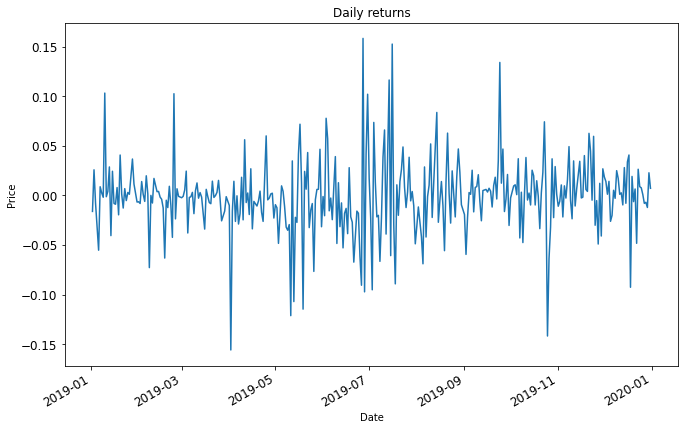

In [ ]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    df_w = df['Close']
    daily_returns = df_w[:-1].values / df_w[1:] - 1
    return daily_returns
daily_returns = compute_daily_returns(data_2019)
plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

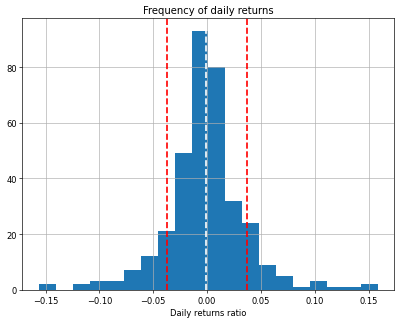

Kurtosis: 3.8428619674953857


In [ ]:
mean = daily_returns.mean()
std = daily_returns.std()
figure(figsize=(8, 6), dpi=60)
daily_returns.hist(bins=20)
plt.axvline(mean,color='w',linestyle = 'dashed',linewidth=2)
plt.axvline(std,color='r',linestyle = 'dashed',linewidth=2)
plt.axvline(-std,color='r',linestyle = 'dashed',linewidth=2)
plt.title("Frequency of daily returns")
plt.xlabel("Daily returns ratio")
plt.show()
print('Kurtosis:', daily_returns.kurtosis())

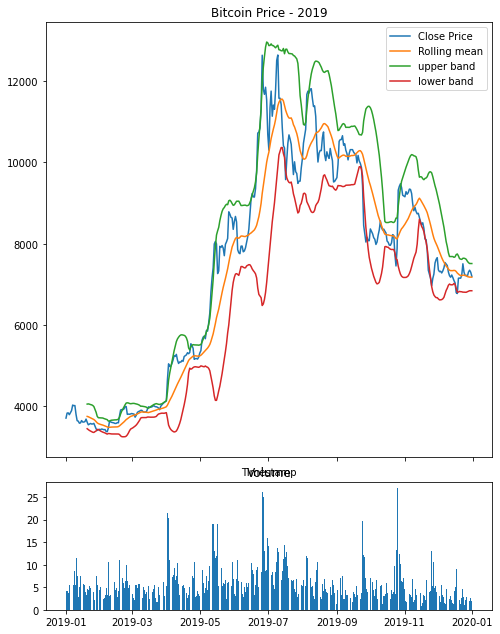

In [ ]:
plt.rcParams['figure.figsize'] = 8, 12

main = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# Plot raw Weighted Price values, rolling mean and Bollinger Bands
ax = data_2019['Weighted_Price'].plot(title="Bollinger Bands", label='Close Price')
rm.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

main.axes.xaxis.set_ticklabels([])

plt.title('Bitcoin Price - 2019')
plt.legend()

vol = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
vol.bar(data_2019.index, data_2019['Volume_(BTC)'])

plt.title('Volume')
plt.show()
# savefig('img.png', bbox_inches='tight', transparent=True)

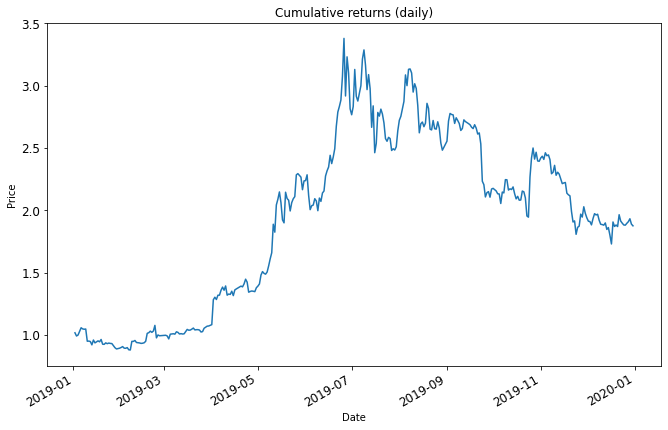

In [ ]:
daily_pct_change = data_2019['Close'].pct_change()
cum_return_daily = (1+daily_pct_change).cumprod()
plot_data(cum_return_daily,title='Cumulative returns (daily)')

In [ ]:
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

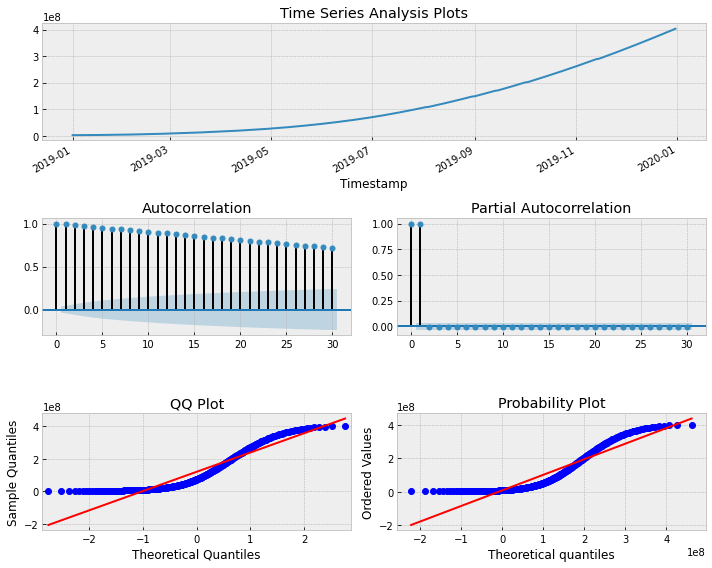

In [ ]:
import numpy as np
n_samples = 351

x = w = data_2019["Close"]
for t in range(n_samples):
    x[t] = x[t-1] + w[t]

_ = tsplot(x, lags=30)

##Etherium [ETH dataset](https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv)

In [ ]:
import pandas as pd
ETHdata = pd.read_csv("ETH_day.csv")

In [ ]:
display(ETHdata)

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
0,2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
1,2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2,2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
3,2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
4,2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57
...,...,...,...,...,...,...,...,...
1433,2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55
1434,2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39
1435,2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11
1436,2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20


**reversing the dataset**

In [ ]:
ETHdata = ETHdata.iloc[::-1]

In [ ]:
 ETHdata["year"] = pd.to_datetime(ETHdata['Date'],format='%Y-%m-%d').dt.year

In [ ]:
 ETHdata["month"] = pd.to_datetime(ETHdata['Date'],format='%Y-%m-%d').dt.month

In [ ]:
 ETHdata["day"] =  pd.to_datetime(ETHdata['Date'],format='%Y-%m-%d').dt.day

In [ ]:
ETHdata = ETHdata.set_index('Date')

In [ ]:
ETHdata

,Symbol,Open,High,Low,Close,Volume ETH,Volume USD,year,month,day
Date,,,,,,,,,,
2016-05-09,ETHUSD,12.00,12.00,9.36,9.98,1317.90,12885.06,2016,5,9
2016-05-10,ETHUSD,9.98,9.98,9.36,9.68,672.06,6578.20,2016,5,10
2016-05-11,ETHUSD,9.68,10.47,9.68,10.43,3052.51,30978.11,2016,5,11
2016-05-12,ETHUSD,10.43,12.00,9.92,10.20,2072.56,22183.39,2016,5,12
2016-05-13,ETHUSD,10.20,11.59,10.20,10.69,1769.71,18923.55,2016,5,13
...,...,...,...,...,...,...,...,...,...,...
2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57,2020,4,11
2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05,2020,4,12
2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28,2020,4,13


In [ ]:
ETH_data_2019 = ETHdata[ETHdata["year"] == 2019]

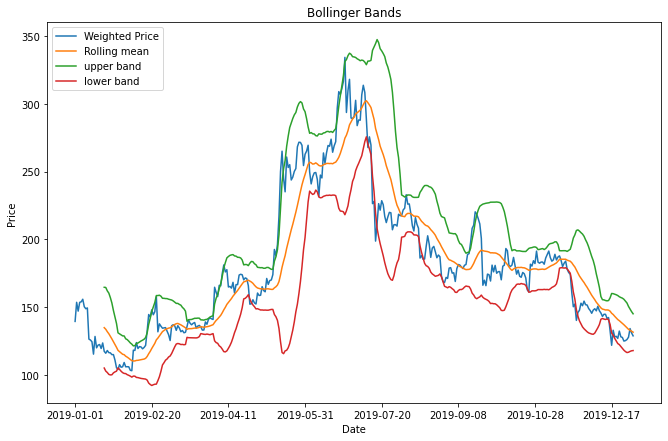

In [ ]:
# 1. Compute rolling mean
rm = get_rolling_mean(ETH_data_2019['Close'], window=20)

# 2. Compute rolling standard deviation
rstd = get_rolling_std(ETH_data_2019['Close'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm, rstd)
    
# Plot raw Weighted Price values, rolling mean and Bollinger Bands
ax = ETH_data_2019['Close'].plot(title="Bollinger Bands", label='Weighted Price')
rm.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

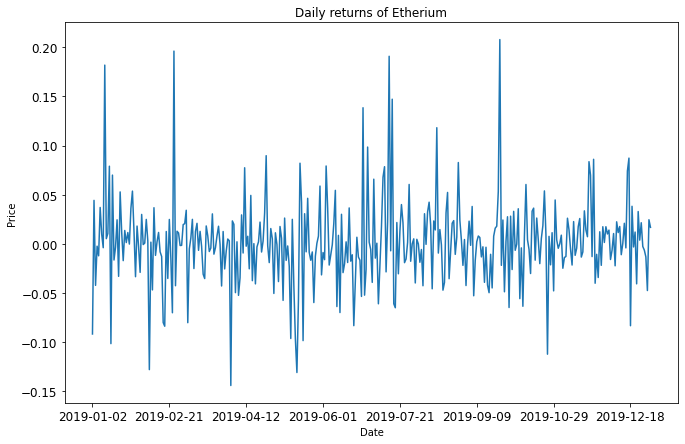

In [ ]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    df_w = df['Close']
    daily_returns = df_w[:-1].values / df_w[1:] - 1
    return daily_returns
daily_returns = compute_daily_returns(ETH_data_2019)
plot_data(daily_returns, title="Daily returns of Etherium", ylabel="Daily returns")

## Bitcoin vs Etherium

**Comparing price variation**

In [ ]:
data_2019["Close"]

Timestamp
2019-01-01      10991.80
2019-01-02      14877.67
2019-01-03      18665.48
2019-01-04      22483.19
2019-01-06      26523.90
                 ...    
2019-12-27    2582506.38
2019-12-28    2589802.62
2019-12-29    2597188.16
2019-12-30    2604408.40
2019-12-31    2611576.76
Name: Close, Length: 351, dtype: float64

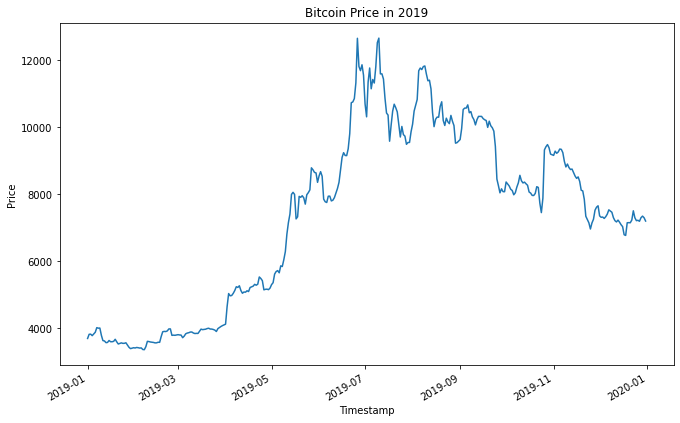

In [ ]:
import matplotlib.pyplot as plt
data_2019["Weighted_Price"].plot()
plt.title("Bitcoin Price in 2019")
plt.ylabel("Price")
plt.show()

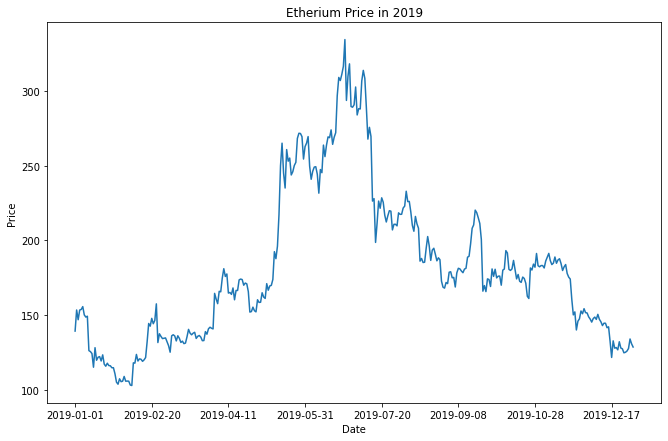

In [ ]:
import matplotlib.pyplot as plt
ETH_data_2019["Close"].plot()
plt.title("Etherium Price in 2019")
plt.ylabel("Price")
plt.show()

**volatility comparision**

In [ ]:
ETH_data_2019["Volatility"] = abs(ETH_data_2019["High"] - ETH_data_2019["Low"])/ETH_data_2019["Close"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


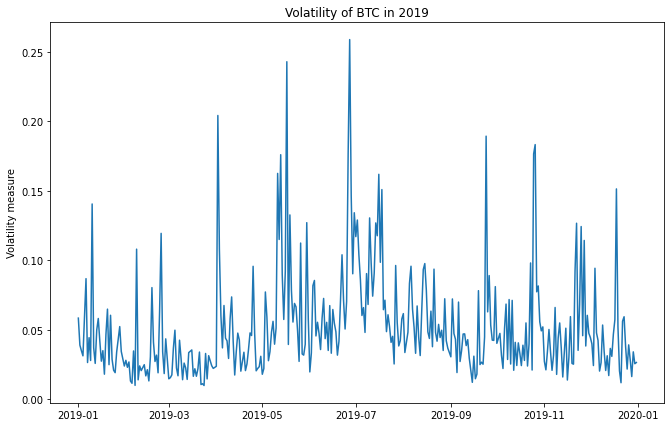

In [ ]:
import matplotlib.pyplot as plt
data_2019.index = pd.to_datetime(data_2019.index).date
data_2019["Volatility"].plot()
plt.title("Volatility of BTC in 2019")
plt.ylabel("Volatility measure")
plt.show()

In [ ]:
display(data_2019)

,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,Volatility,Close
2019-01-01,3845.46,3629.66,4.220989,15663.481588,3700.678699,2019.0,1.0,1.0,0.058314,10991.80
2019-01-02,3918.67,3770.00,4.208722,16124.785439,3824.381088,2019.0,1.0,2.0,0.038874,14877.67
2019-01-03,3893.40,3760.00,3.764299,14372.040673,3829.104391,2019.0,1.0,3.0,0.034838,18665.48
2019-01-04,3850.33,3732.38,5.515958,20888.264006,3784.333248,2019.0,1.0,4.0,0.031168,22483.19
2019-01-06,4090.00,3753.00,4.426815,17563.646435,3885.331236,2019.0,1.0,6.0,0.086736,26523.90
...,...,...,...,...,...,...,...,...,...,...
2019-12-27,7255.37,7052.00,2.836202,20355.776200,7191.861072,2019.0,12.0,27.0,0.028278,2582506.38
2019-12-28,7349.65,7231.00,1.143883,8347.973576,7298.713255,2019.0,12.0,28.0,0.016256,2589802.62
2019-12-29,7524.46,7274.43,1.880532,13915.705050,7345.635971,2019.0,12.0,29.0,0.034038,2597188.16
2019-12-30,7384.90,7199.00,2.601617,18942.676610,7297.912752,2019.0,12.0,30.0,0.025473,2604408.40


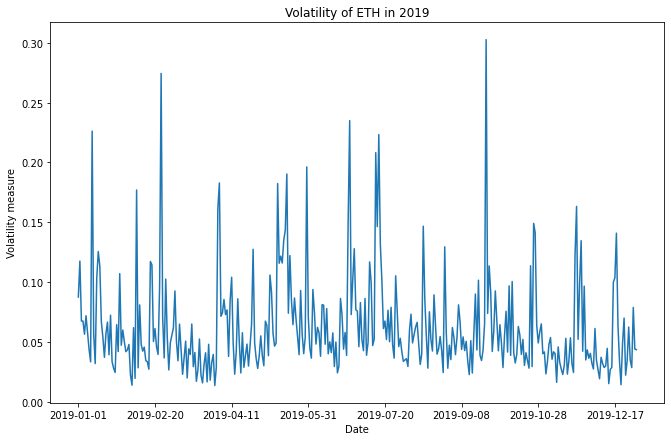

In [ ]:
import matplotlib.pyplot as plt
ETH_data_2019["Volatility"].plot()
plt.title("Volatility of ETH in 2019")
plt.ylabel("Volatility measure")
plt.show()

In [ ]:
Volatility_BTC = np.mean(np.abs(data_2019["Volatility"]))
print("Absolute mean of volatility of BTC in year 2019 is",Volatility_BTC)

Absolute mean of volatility of BTC in year 2019 is 0.052563491243940816


In [ ]:
Volatility_ETH = np.mean(np.abs(ETH_data_2019["Volatility"]))
print("Absolute mean of volatility of ETH in year 2019 is",Volatility_ETH)

Absolute mean of volatility of ETH in year 2019 is 0.06223554224301952


# SVM

In [ ]:
from sklearn.svm import LinearSVR #SVR with Linear kernel/ Faster than general SVR with linear kernel

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#drop nan
df = data_new.dropna()

In [ ]:
df.describe()

,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,Volatility
count,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000,3375.000000
mean,4752.106856,4443.822963,10.351683,31800.198253,4606.939732,2016.134222,6.406222,15.735111,0.059946
std,8498.128120,7875.132685,8.895652,62760.904279,8207.865417,2.673621,3.480749,8.800381,0.063680
min,4.380000,1.500000,0.250000,1.227500,4.331667,2012.000000,1.000000,1.000000,0.000000
25%,249.960000,239.970000,4.670342,1916.660938,245.040671,2014.000000,3.000000,8.000000,0.025468
50%,716.540000,670.320000,7.619850,6834.276054,698.303301,2016.000000,6.000000,16.000000,0.043092
75%,7430.535000,7059.330000,13.109359,36113.850377,7243.275075,2018.000000,9.000000,23.000000,0.071541
max,61781.830000,58959.570000,119.522868,950995.602917,60455.844831,2021.000000,12.000000,31.000000,1.068454


In [ ]:
df.isna().sum()

High                 0
Low                  0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
year                 0
month                0
day                  0
Volatility           0
dtype: int64

In [ ]:
def create_dataset(data, seq_len=1):
    X, Y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:(i + seq_len)])#input of seq_len days
        Y.append(data[i + seq_len])#can be changed to accomodate for predicting more than one day
    return np.array(X), np.array(Y)

In [ ]:
np.shape(create_dataset(df["Weighted_Price"][:-3300], seq_len=50)[0])

(25, 50)

In [ ]:
X_train, Y_train = create_dataset(df["Weighted_Price"][:-1000], seq_len=50)
X_test, Y_test = create_dataset(df["Weighted_Price"][-1000:], seq_len=50)


svr = LinearSVR( epsilon = 1e-1, C = 0.1, max_iter=2e4)
res = svr.fit(X_train, Y_train)


print(res.score(X_train, Y_train))
print(res.score(X_test, Y_test))

0.9957529980888065
0.995025524003825


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
pred = res.predict(X_test)

Text(0.5, 1.0, 'Predictions on Test data')

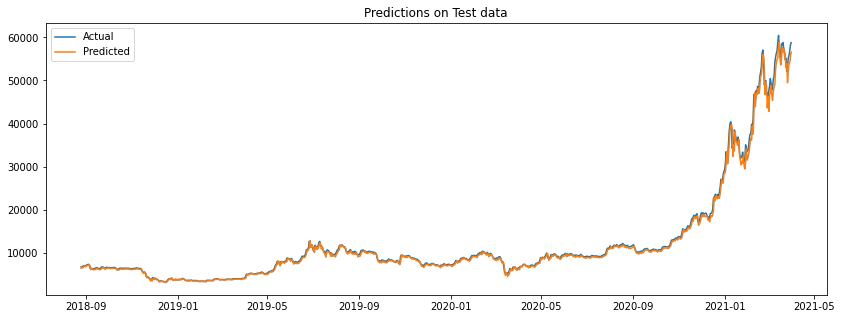

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(df.index[-len(pred):],Y_test);
plt.plot(df.index[-len(pred):],pred);
plt.legend(['Actual', 'Predicted'])
plt.title("Predictions on Test data")

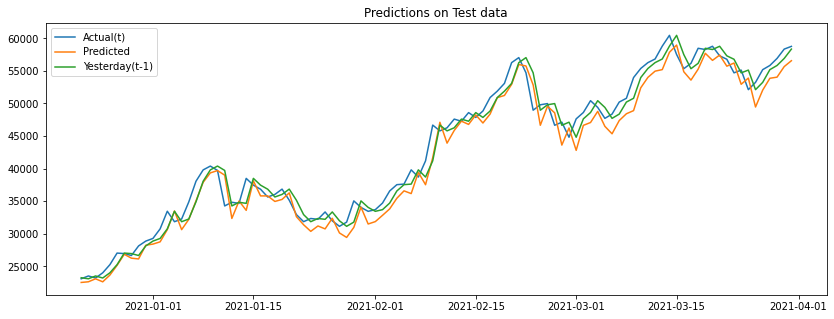

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(df.index[-len(pred):][-100:],Y_test[-100:]);
plt.plot(df.index[-len(pred):][-100:],pred[-100:]);
plt.plot(df.index[-len(pred):][-100:],pd.Series(Y_test).shift(1)[-100:]);
plt.legend(['Actual(t)', 'Predicted', 'Yesterday(t-1)']);
plt.title("Predictions on Test data")
plt.savefig('predictions_closeup_svm.png')

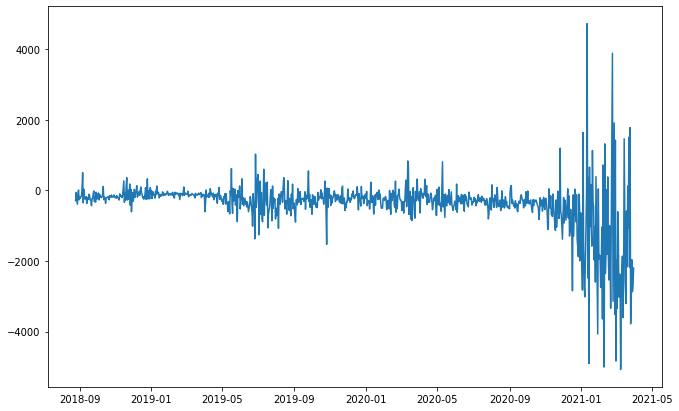

In [ ]:
plt.plot(df.index[-len(pred):],pred-Y_test);

In [ ]:
#mean absolute error
(abs(pred - Y_test)/Y_test).mean()

0.0367477787130878

In [ ]:
#mean squared error
(((pred - Y_test)/Y_test)**2).mean()

0.0020508326806521326

| Model\Error | MAE | MSE |
|---|---| --- | 
| SVR |  0.0367 | 0.0021 |

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# param={'n_estimators': range(100,1000,300),'max_depth': [2,5,8,10], 'warm_start':[True, False] }

# forest = RandomForestRegressor()
# forest = GridSearchCV(forest,param_grid=param,scoring='r2',cv=5,return_train_score=True,n_jobs=-1, verbose=2)
# forest.fit(X_train, Y_train)

# randomforest_score = forest.score(X_test, Y_test)

# print('Forest Score: ', randomforest_score)

In [ ]:
# forest.best_params_

{'max_depth': 8, 'n_estimators': 100, 'warm_start': False}

In [ ]:
#Tuned Hyperparameters
forest = RandomForestRegressor(n_estimators=100, max_depth=8)
forest.fit(X_train, Y_train)

print("Train score: ", forest.score(X_train, Y_train))
print("Test score: ", forest.score(X_test, Y_test))

Train score:  0.9994069748513636
Test score:  0.3352344406566584


In [ ]:
forest_pred = forest.predict(X_test)

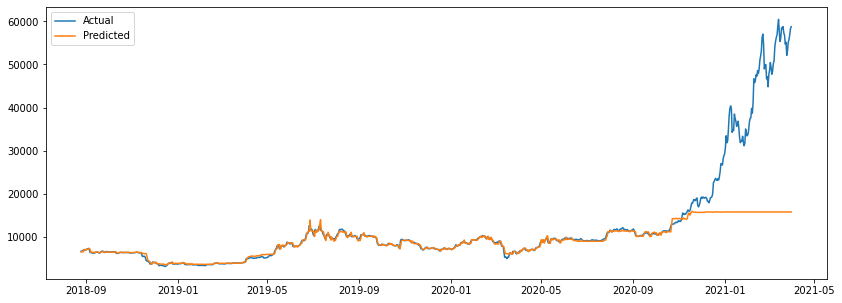

In [ ]:
plt.figure(figsize = (14,5))
plt.plot(df.index[-len(forest_pred):],Y_test);
plt.plot(df.index[-len(forest_pred):],forest_pred);
plt.legend(['Actual', 'Predicted'])
# plt.savefig('test_predictions_rf.png')

In [ ]:
#Mean Squared Error
(((forest_pred-Y_test)/Y_test)**2).mean()

0.04386539579749929

In [ ]:
#Mean Absolute error
((abs(forest_pred-Y_test)/Y_test)).mean()

0.09908192028012502

| Model\Error | MAE | MSE |
|---|---| --- | 
| Random Forest |  0.0991 | 0.0439 |

# LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

np.random.seed(0)

In [ ]:
df= pd.read_csv("Bitcoin_2012_2021.csv")

In [ ]:
df= df.set_index("Timestamp")

df.loc["2015-01-07"]= (df.loc["2015-01-05"]+df.loc["2015-01-09"])/2
df.loc["2015-01-06"]= (df.loc["2015-01-05"]+df.loc["2015-01-07"])/2
df.loc["2015-01-08"]= (df.loc["2015-01-09"]+df.loc["2015-01-07"])/2

In [ ]:
df

,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day,Volatility
Timestamp,,,,,,,,,
2012-01-01,5.00,4.58,7.200667,35.259720,4.806667,2012.0,1.0,1.0,0.087379
2012-01-02,5.00,5.00,19.048000,95.240000,5.000000,2012.0,1.0,2.0,0.000000
2012-01-03,5.32,5.14,11.004660,58.100651,5.252500,2012.0,1.0,3.0,0.034269
2012-01-04,5.57,4.93,11.914807,63.119577,5.208159,2012.0,1.0,4.0,0.122884
2012-01-05,6.65,5.72,4.514373,27.987370,6.284127,2012.0,1.0,5.0,0.147992
...,...,...,...,...,...,...,...,...,...
2021-03-27,56686.15,53948.35,1.823877,100884.732367,55193.357260,2021.0,3.0,27.0,0.049604
2021-03-28,56573.04,54677.51,1.447939,80632.115263,55832.958824,2021.0,3.0,28.0,0.033950
2021-03-29,58402.68,54892.42,3.732887,213754.555988,56913.993819,2021.0,3.0,29.0,0.061677


In [ ]:
df.reset_index(inplace=True)
split_idx= df[df["Timestamp"] >= '2021'].index[0]
df= df.drop(["High","Low","Timestamp","Volume_(Currency)"],axis=1)

In [ ]:
df

,Volume_(BTC),Weighted_Price,year,month,day,Volatility
0,7.200667,4.806667,2012.0,1.0,1.0,0.087379
1,19.048000,5.000000,2012.0,1.0,2.0,0.000000
2,11.004660,5.252500,2012.0,1.0,3.0,0.034269
3,11.914807,5.208159,2012.0,1.0,4.0,0.122884
4,4.514373,6.284127,2012.0,1.0,5.0,0.147992
...,...,...,...,...,...,...
3373,1.823877,55193.357260,2021.0,3.0,27.0,0.049604
3374,1.447939,55832.958824,2021.0,3.0,28.0,0.033950
3375,3.732887,56913.993819,2021.0,3.0,29.0,0.061677
3376,2.363999,58346.912268,2021.0,3.0,30.0,0.040750


In [ ]:
Y= df["Weighted_Price"]
X= df.drop(["Weighted_Price"],axis=1)

x_scaler= MinMaxScaler(copy = True, feature_range = (-1, 1))
y_scaler= MinMaxScaler(copy = True, feature_range = (-1, 1))
x_scaler.fit(np.array(X))
y_scaler.fit(np.array(Y).reshape(-1,1))

X= x_scaler.transform(np.array(X))
Y= y_scaler.transform(np.array(Y).reshape(-1,1))

In [ ]:
 def data_prep(input, target, start, end, window, horizon):
     X = []
     y = []
     
     start=start+window
     if end is None:
         end = len(input)-horizon
     for i in range(start, end):
         X.append(input[i-window:i])
         y.append(target[i+1:i+1+horizon]) 

     return np.array(X), np.array(y)

In [ ]:
 window = 30
 horizon = 1
 x_train, y_train = data_prep(X, Y, 0, split_idx, window, horizon)
 x_test, y_test = data_prep(X, Y, split_idx, None, window, horizon) 

In [ ]:
# def build_model(inputs, output_size, neurons, activ_func = "linear", dropout = 0.25, loss = "mae", optimizer = "adam"):
#     model = Sequential()
#     model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
#     model.add(Dropout(dropout))
#     model.add(Dense(units = output_size))
#     model.add(Activation(activ_func))
#     model.compile(loss = loss, optimizer = optimizer)
#     return model
# model = build_model(x_train, output_size = 1, neurons = 20)

# btc_history = model.fit(x_train,y_train,epochs = 100, validation_data=(x_test,y_test), batch_size = 1, verbose = 2)

lstm_model = tf.keras.models.Sequential([
   tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True), 
                                input_shape=x_train.shape[-2:]),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dense(20, activation='tanh'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(units=horizon),
 ])
lstm_model.compile(optimizer='adam', loss='mae')
lstm_model.summary() 

model_path = 'LSTM_bitcoin.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

btc_history = lstm_model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=30,verbose=1,callbacks=callbacks)

In [ ]:
# Plot training error of model
fig, ax1 = plt.subplots(1,1)
ax1.plot(btc_history.epoch, btc_history.history['loss'])
ax1.plot(btc_history.epoch,btc_history.history['val_loss'])
ax1.set_title('Error Plot')
ax1.set_ylabel('Mean Absolute Error (MAE)', fontsize = 12)    
ax1.set_xlabel('Epoch number', fontsize = 12)
ax1.legend(['train loss', 'validation loss'])
plt.show()

# ARIMA



An ARIMA model is a class of statistical models for analyzing and forecasting time series data. ARIMA model is one model for non-stationarity. It assumes that the data becomes stationary after differencing.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

These acronyms describe it pretty well:

    AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations. 
    I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
    MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

Parameters are defined as follows:

    p: The number of lag observations included in the model, also called the lag order.
    d: The number of times that the raw observations are differenced, also called the degree of differencing.
    q: The size of the moving average window, also called the order of moving average.



In [ ]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def test_stationarity(x):

    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = data['Weighted_Price']      
test_stationarity(ts)

In [ ]:
ts_log = np.log(ts)
plot.plot(ts_log,color="green")
plot.show()

test_stationarity(ts_log)

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
# follow lag
model = ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

In [ ]:
# follow error
model = ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plot.show()

In [ ]:
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit(disp=-1)  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

In [ ]:
size = int(len(ts_log)-100)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]

history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')

# We go over each value in the test set and then apply ARIMA model and 
# calculate the predicted value. We have the expected value in the test set
# therefore we calculate the error between predicted and expected value 

for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)

    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')

    predictions.append(float(pred_value))
    originals.append(float(original_value))

# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')

plot.figure(figsize=(8, 6))
test_day = [t for t in range(len(test_arima))]

labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Weighted_Price')
plot.legend(labels)
plot.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(predictions, originals)
r2 = r2_score(predictions, originals)

In [ ]:
np.sqrt(mse)

In [ ]:
r2